The dataset used below is from Kaggle and is of a bank's customer churn records (https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn). As the webpage says, 'it is advantageous for banks to know what leads a client towards the decision to leave the company' and that 'it is much more expensive to sign in a new client than keeping an existing one'. So by knowing what features to look for in predicting if a customer will leave the bank or not, the bank can then attempt retention campaigns and other schemes to ensure their customers stay with the bank.

The three code sections below 1. import the necessary packages, 2. read in the csv file that contains the banks data and 3. looks at the data types of our features that we will be working with

In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [119]:
df = pd.read_csv('../data/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Ths next two code sections 1. identify the relevant features that will be necessary for making predictions on our customer churn model and 2. the target variable of if the customer did in fact left the bank or not.

In [121]:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']

relevant_feature_df = df[features]
relevant_feature_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [122]:
target_vector = df['Exited'].values
target_vector

array([1, 0, 1, ..., 1, 1, 0])

This section looks at the distributions of some of the features from the data that we will be working with

The first plot shows the distribution of the 'Age' column. The average age looks to be around 36 years old with numerous outliers above the 60 year old mark. 

<Axes: ylabel='Age'>

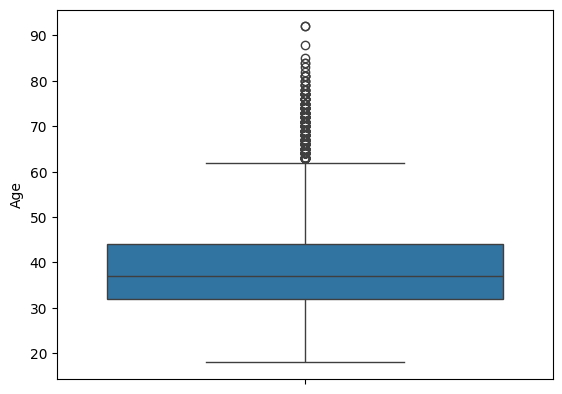

In [123]:
sns.boxplot(data=relevant_feature_df['Age'])

This next plot looks at the distribution of the countries in our data. France looks to be close to twice as occurant as both Spain and Germany.

<Axes: xlabel='Geography', ylabel='Count'>

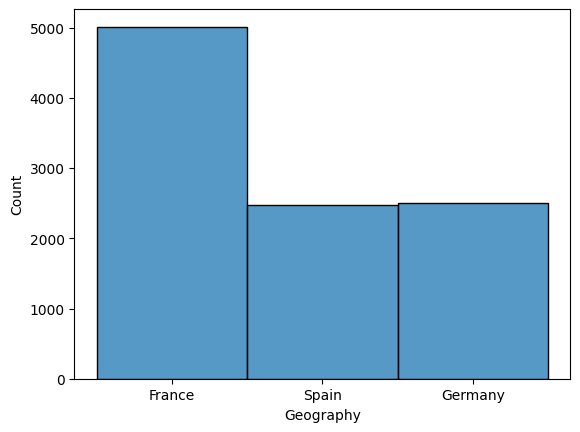

In [124]:
sns.histplot(data=relevant_feature_df, x='Geography')

The next plot looks at the distribution of the balances of bank customers. As the plot shows, over 3500 customers have a 0 account balance, but if you look at the other balances it shows an equal distribution of customers' account balances.

<Axes: xlabel='Balance', ylabel='Count'>

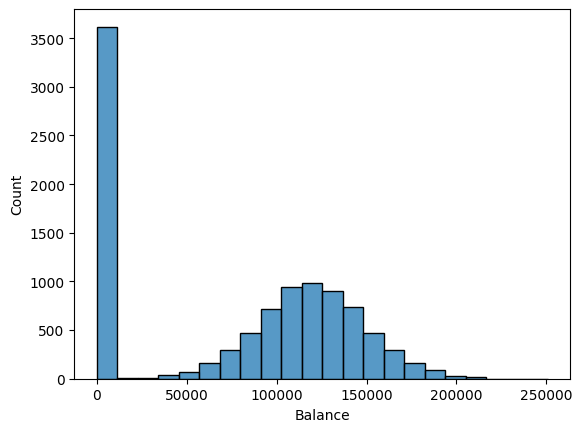

In [125]:
# sns.boxplot(data=relevant_feature_df, y='Balance')
sns.histplot(data=relevant_feature_df, x='Balance')

The next plot shows the 'CreditScore' distribution of our data which shows a fairly even distribution with a spike in credit score at the higher end.

<Axes: xlabel='CreditScore', ylabel='Count'>

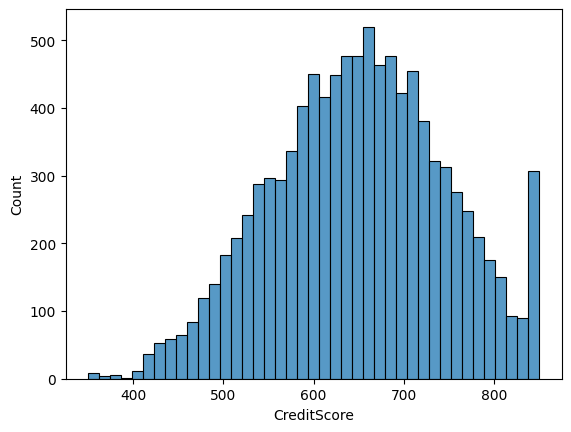

In [126]:
sns.histplot(data=relevant_feature_df, x='CreditScore')

The next two code sections show the normalized or percentage of 1. 'Gender' and 2. 'Complain'. The 'Gender' column looks fairly even with Male making up just over half of the instances in our dataset. The 'Complain' column looks like nearly 80% of the instances never issued a complaint whereas 20% did.

In [127]:
relevant_feature_df['Gender'].value_counts(normalize=True)

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

In [128]:
relevant_feature_df['Complain'].value_counts(normalize=True)


Complain
0    0.7956
1    0.2044
Name: proportion, dtype: float64

This last plot looks at the 'EstimatedSalary' of our dataset which looks to be fairly evenly distributed.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

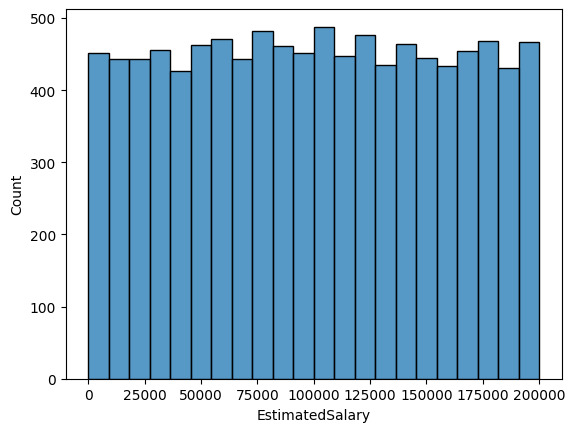

In [129]:
sns.histplot(data=relevant_feature_df, x='EstimatedSalary')